# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals

**This is the updated demo notebook for `molonari`. Dated 2025**

> Last update : Noé (12nov)

The object of this demo is to present a class responsible for generating a simulation of pressure and temperature sensor data in cases where data from the CAPTEUR project is not available. Based on the `synthetic_MOLONARI` class in `synthetic_MOLONARI.py`.

We will show the `synthetic_MOLONARI` object which allows generating purely periodic datasets with the possibility of Gaussian noise. We will illustrate the interaction of `synthetic_MOLONARI` with the `Column` class and the `layer` class.

The other demo file `demo_val_direct.ipynb` highlights a more global use of the classes from `synthetic_MOLONARI.py` and `val_analy.py`.


In [1]:
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## 0. Realistic generation

In [2]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s) # A AMELIORER AVEC UN CONVERTISSEUR AUTOMATIQUE D'UNITES

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 5
T_riv_offset = 20  + zeroT
nday = 3
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period

Define what is your value of $z_\text{bottom}$ first.

In [3]:
Zbottom = 0.4

Enter the charge data at $z_\text{bottom}$.

In [4]:
dH_amp = 0.01
dH_offset = 0.02 #1meter ?
P_dh = nday*NHOURINDAY*4*dt #14*24*4*dt

First, we generate an artificial aquifier at depth $z_\text{aq}$ and we assume that the column is homogenous, so we can propagate the gradient till the end of the column (i.e up to $z_\text{aq}$)

In [5]:
Z_aq = 8

Enter the physical parameters of the column

In [6]:
intrinK = 1e-11
q_s = -1e-7
n = 0.1
lambda_s = 2
rhos_cs = 4e6

You should also define what is the temperature of the aquifier.

In [7]:
T_aq_amp = 0
#T_aq_offset = 14 + zeroT
T_aq_offset = T_riv_offset
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle

depth_sensors = [Zbottom, Z_aq]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0
sigma_meas_T = 0

print("dt={0:.1f}s".format(dt))

dt=900.0s


param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [[0.4], [0.2, 259200, 0]]
param_T_riv_signal: [[293.15], [5, 259200, 0], [5, 3110400, 0]]
param_T_aq_signal: [[293.15], [0, -9999, 0]]
sigma_meas_P: 0
sigma_meas_T: 0
No forced bottom temperature, generating all series
Multiple periodic signals detected, summing components with global offset.


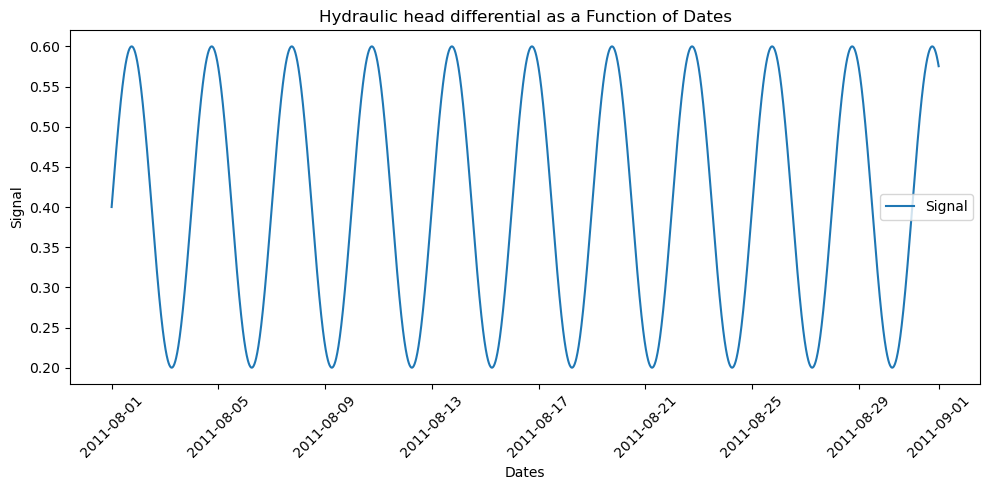

Multiple periodic signals detected, summing components with global offset.


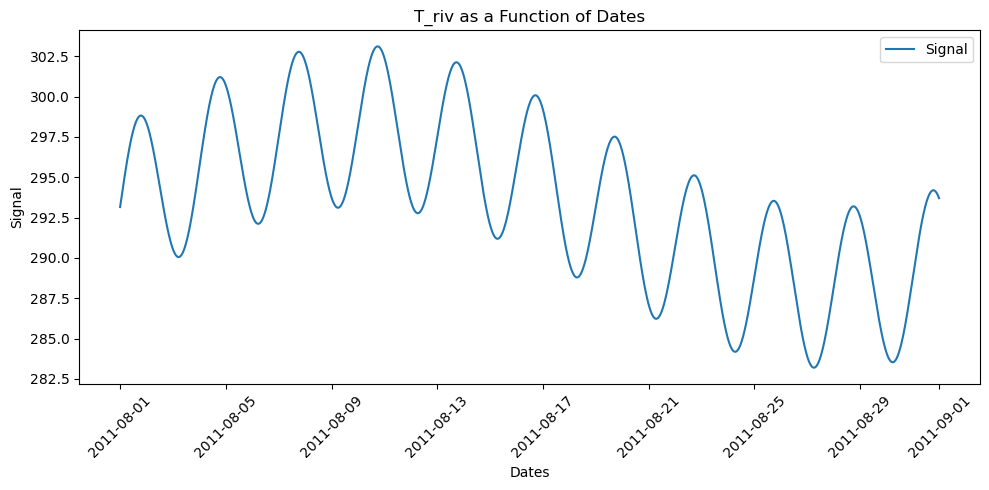

Multiple periodic signals detected, summing components with global offset.


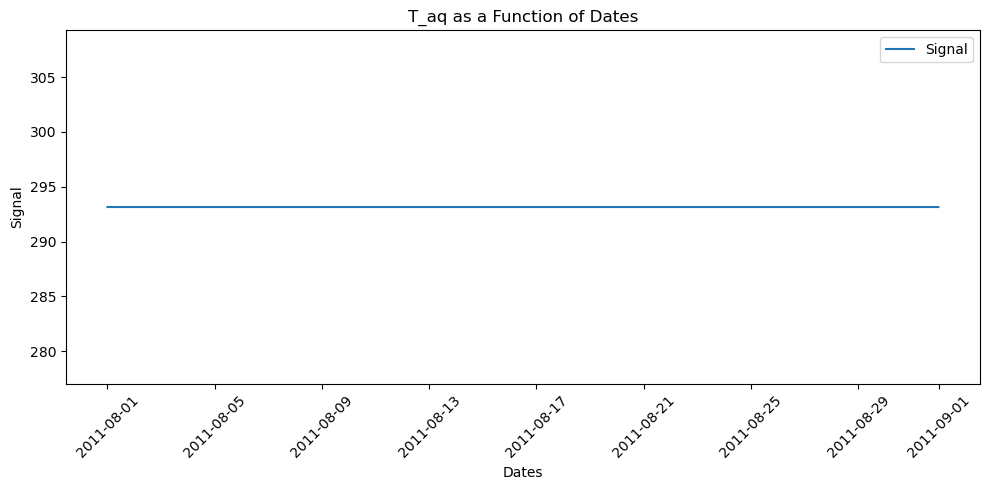

Generating Shaft with 2 sensors
2 sensors in the shaft
Temperature of Sensor 0 : [293.1499939  293.26224976 293.37444763 ... 293.75481873 293.71350555
 293.67019196]
Temperature of Sensor 1 : [293.1499939 293.1499939 293.1499939 ... 293.1499939 293.1499939
 293.1499939]
dH : [(datetime.datetime(2011, 8, 1, 0, 0), (np.float32(0.4), np.float32(293.15))), (datetime.datetime(2011, 8, 1, 0, 15), (np.float32(0.40436298), np.float32(293.26816))), (datetime.datetime(2011, 8, 1, 0, 30), (np.float32(0.4087239), np.float32(293.38626))), (datetime.datetime(2011, 8, 1, 0, 45), (np.float32(0.41308063), np.float32(293.50427))), (datetime.datetime(2011, 8, 1, 1, 0), (np.float32(0.41743115), np.float32(293.62213))), (datetime.datetime(2011, 8, 1, 1, 15), (np.float32(0.42177337), np.float32(293.73978))), (datetime.datetime(2011, 8, 1, 1, 30), (np.float32(0.42610523), np.float32(293.85718))), (datetime.datetime(2011, 8, 1, 1, 45), (np.float32(0.4304247), np.float32(293.97424))), (datetime.datetime(2011, 

In [8]:
"""Instanciation de l'objet Time_series"""

ratio = Z_aq/Zbottom

# Add-On 2025 : Maintenant on peut créer des signaux multi-périodiques
liste_param_dH = [[dH_offset*ratio], [dH_amp*ratio, P_dh, 0]]
liste_param_T_riv = [[T_riv_offset], [T_riv_amp, P_T_riv, 0], [T_riv_amp, P_T_riv*12, 0]]
liste_param_T_aq = [[T_aq_offset], [T_aq_amp, P_T_aq, 0]]


# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": liste_param_dH,
	"param_T_riv_signal": liste_param_T_riv,
    "param_T_aq_signal": liste_param_T_aq,
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_aquifier = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


print(f"dH : {emu_observ_aquifier._molonariP_data}")
print(f"Tshaft : {emu_observ_aquifier._T_Shaft_measures}")


In [9]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "IntrinK": intrinK,
    "n": n,
    "lambda_s": lambda_s,
    "rhos_cs": rhos_cs,
    "q_s": q_s,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 1000
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": Z_aq, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_aquifier._molonariP_data,
    "T_measures": emu_observ_aquifier._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col_aq = Column.from_dict(col_dict,verbose=True)
col_aq.set_layers(Layer1)

Layer: Couche en sable : ends at 0.4 m. Param(IntrinK=1e-11, n=0.1, lambda_s=2, rhos_cs=4000000.0, q_s=-1e-07)
Column created with success
Number of time steps: 2976
Time step in days: 0.01041316644265233
T_riv: [293.15    293.26816 293.38626 ... 293.78665 293.74316 293.69757]
T_aq: [293.1499939 293.1499939 293.1499939 ... 293.1499939 293.1499939
 293.1499939]
dH : [0.4        0.40436298 0.4087239  ... 0.57937455 0.5774022  0.57534534]
list of dates   : [datetime.datetime(2011, 8, 1, 0, 0), datetime.datetime(2011, 8, 1, 0, 15), datetime.datetime(2011, 8, 1, 0, 30), datetime.datetime(2011, 8, 1, 0, 45), datetime.datetime(2011, 8, 1, 1, 0), datetime.datetime(2011, 8, 1, 1, 15), datetime.datetime(2011, 8, 1, 1, 30), datetime.datetime(2011, 8, 1, 1, 45), datetime.datetime(2011, 8, 1, 2, 0), datetime.datetime(2011, 8, 1, 2, 15), datetime.datetime(2011, 8, 1, 2, 30), datetime.datetime(2011, 8, 1, 2, 45), datetime.datetime(2011, 8, 1, 3, 0), datetime.datetime(2011, 8, 1, 3, 15), datetime.date

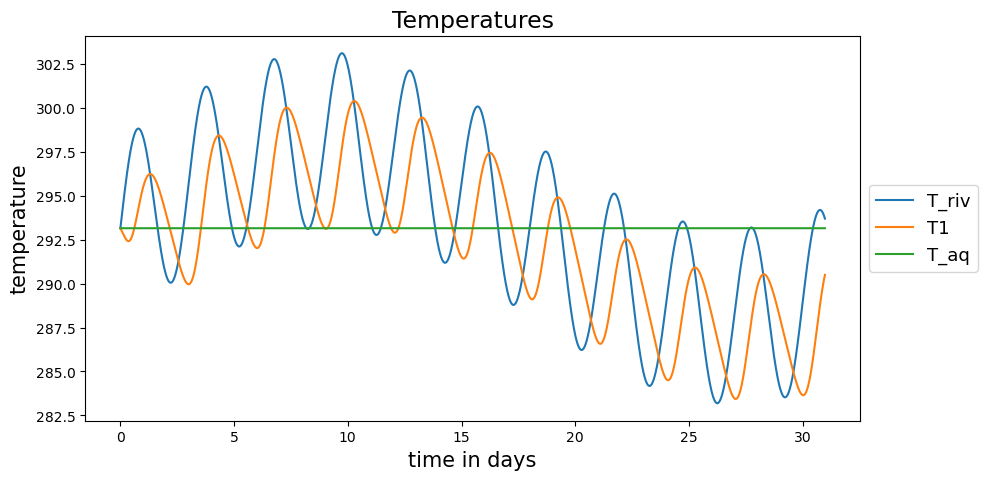

In [10]:
emu_observ_aquifier._measures_column_one_layer(col_aq)
#emu_observ_aquifier._plot_molonariT_data()
col_aq.plot_temperature_at_sensors(verbose=False)

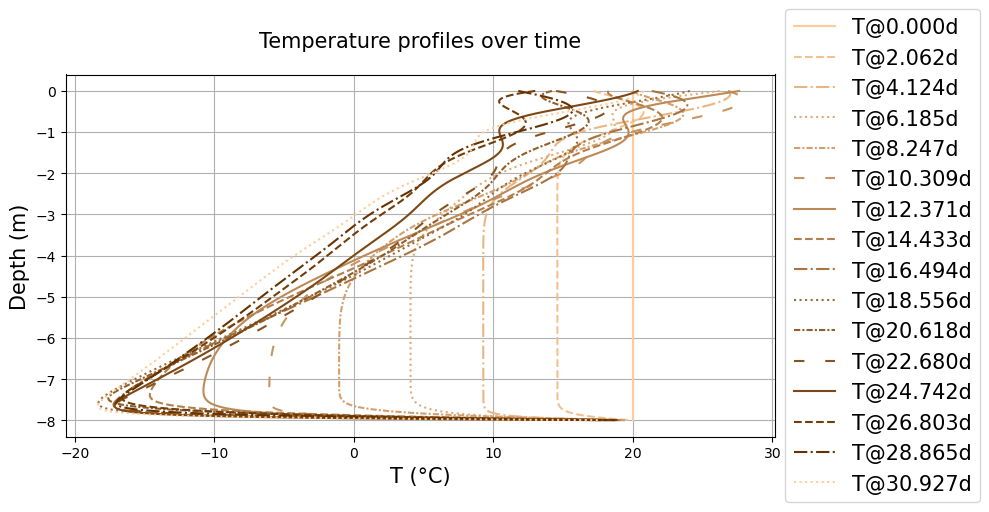

In [11]:
nt = len(col_aq._temperatures[0,:])
dplot=15
col_aq.plot_temperatures_umbrella(round(nt/dplot))

Now extract the temperature at $z_\text{bottom}$

In [12]:
# Extract the temperature corresponding to z = Zbottom
# Extract the temperature corresponding to z = Zbottom
# on veut trouver l'indice le plus proche
z_arr = np.asarray(col_aq._z_solve)
idx_bottom = int(np.argmin(np.abs(z_arr - Zbottom)))

temperature_bottom = col_aq._temperatures[idx_bottom, :]

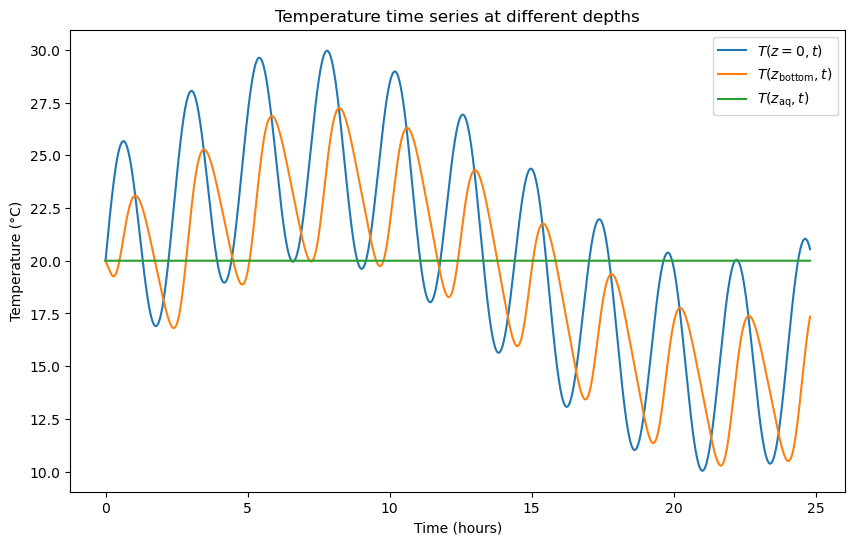

In [13]:
plt.figure(figsize=(10,6))
plt.plot(emu_observ_aquifier._time_array/(3600*30), col_aq._T_riv - ZERO_CELSIUS, label=r'$T(z = 0, t)$')
plt.plot(emu_observ_aquifier._time_array/(3600*30), temperature_bottom - ZERO_CELSIUS, label=r'$T(z_\text{bottom}, t)$')
plt.plot(emu_observ_aquifier._time_array/(3600*30), col_aq._T_aq - ZERO_CELSIUS, label=r'$T(z_\text{aq}, t)$')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature time series at different depths')
plt.legend()

Now we can just use the signal of `temperature_bottom` as our synthetic data for the aquifer bottom temperature.

## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

**Note that `dt` has been set up with a value of 15 minutes to replicate field experiments conditions**

In [14]:
depth_sensors = [.1, .2, .3, .4]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=900.0s


**Important remark.** There has been many confusions before on what was the signification of $Z_\text{bottom}$. Note that $Z_\text{bottom}$ is not the depth of the river. It's where the hydraulic charge sensor is positionned. Meaning that the effective gradient :

$$
\dfrac{\mathrm{d}H}{\mathrm{d}z} := \dfrac{\mathrm{d}H}{Z_\text{bottom}}
$$

*If you want to replicate field measurements you should always leave `Zbottom = 0.4`.*

## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors $T_1, T_2, T_3$, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series $\mathrm{d}H = H_\text{riv}-H_\text{aq}$.

---------

As of 2025, the syntax to create the signals has changed. In fact, now you can create multiperiodic signals.

Say you want to create a simple signal $y(t) = A + B\sin(2\pi t/P + \phi)$, then you would use : `liste_param_T_riv = [[A], [B, P, phi]]`.
Say you want to create a multiperiodic signal $y(t) = A + B\sin(2\pi t/P_1 + \phi_1) + C\sin(2\pi t/P_2 + \phi_2)$: , then you would use : `liste_param_T_riv = [[A], [B, P1, phi1], [C, P2, phi2]]`.
The syntax is :

```python
liste_param_T_riv = [[offset], [ampl1, period1, phase1], ..., [amplN, periodN, phaseN]]
```

param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [[0.02], [0.01, 259200, 0]]
param_T_riv_signal: [[293.15], [5, 259200, 0], [5, 3110400, 0]]
param_T_aq_signal: [[293.15], [0, -9999, 0]]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
USER PROVIDED BOTTOM TEMPERATURE SERIES !
Forcing bottom temperature with provided array
Multiple periodic signals detected, summing components with global offset.


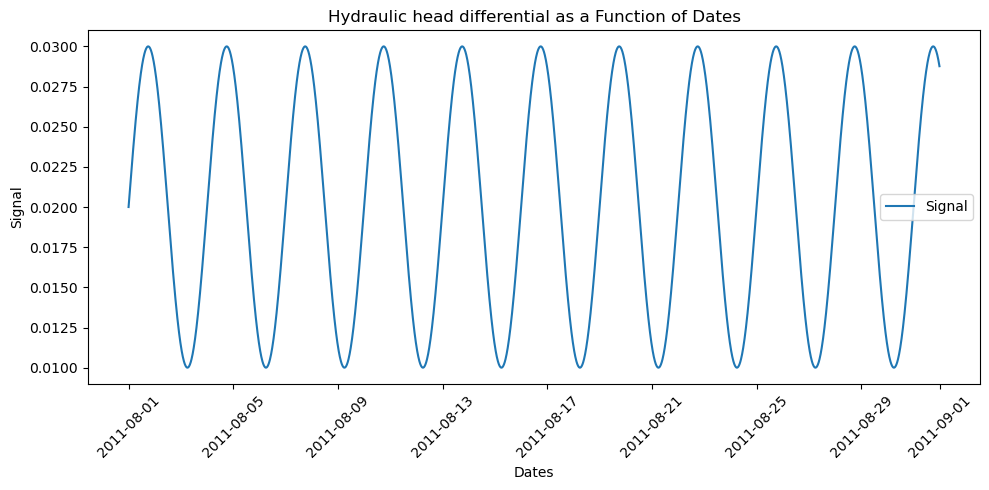

Multiple periodic signals detected, summing components with global offset.


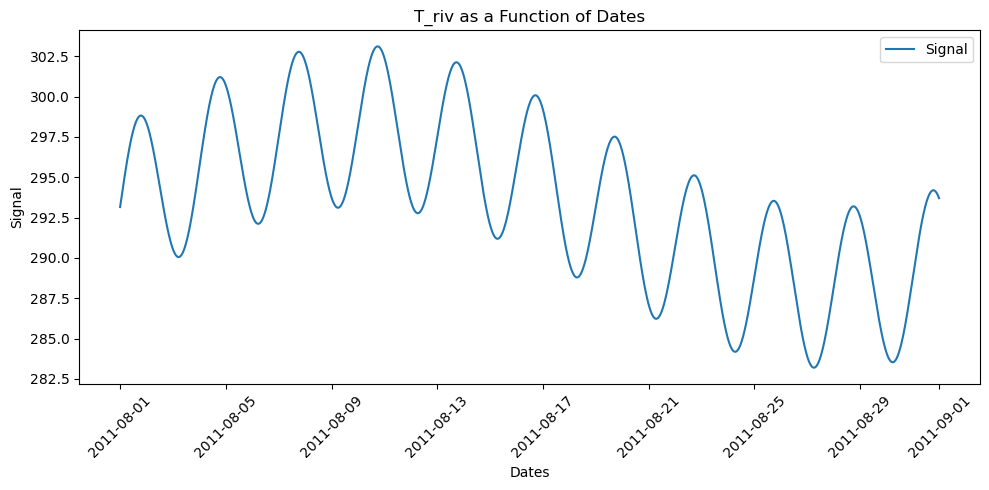

Multiple periodic signals detected, summing components with global offset.


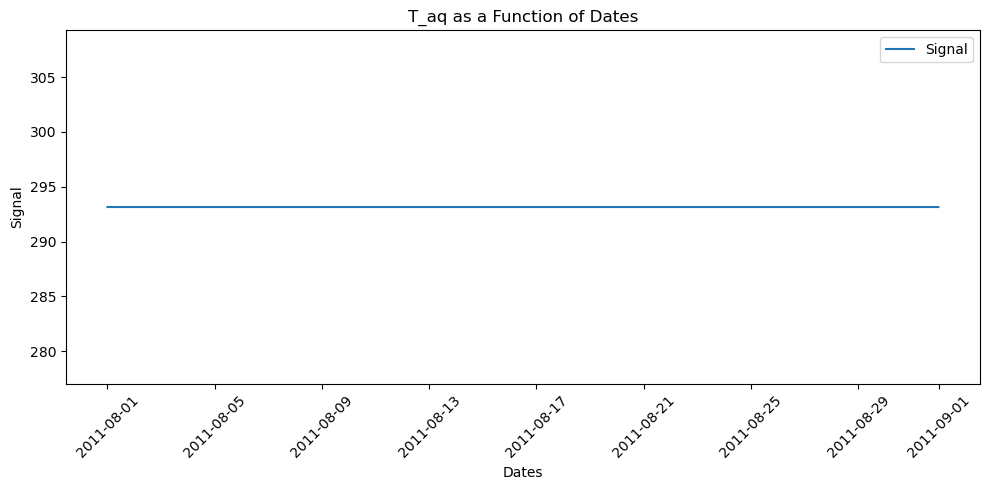

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [293.1499939  293.23861694 293.32719421 ... 293.62748718 293.59487152
 293.56067657]
Temperature of Sensor 1 : [293.1499939  293.20907593 293.26812744 ... 293.46832275 293.44657898
 293.42378235]
Temperature of Sensor 2 : [293.1499939  293.17953491 293.20906067 ... 293.30915833 293.29828644
 293.28688812]
Temperature of Sensor 3 : [293.1499939 293.1499939 293.1499939 ... 293.1499939 293.1499939
 293.1499939]
Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [293.20570374 293.10746002 293.33010864 ... 292.94500732 292.96660614
 292.92360687]
Temperature of Sensor 1 : [293.18713379 293.11244202 293.25167847 ... 292.08563232 292.12211609
 292.11485291]
Temperature of Sensor 2 : [293.16856384 293.11742401 293.17324829 ... 291.22625732 291.27762604
 291.30609894]
Temperature of Sensor 3 : [293.1499939  293.12240601 293.09481812 ... 290.36688232 290.43313599
 290.49734497]
dH : [(d

In [15]:
"""Instanciation de l'objet Time_series"""

# Add-On 2025 : Maintenant on peut créer des signaux multi-périodiques
liste_param_dH = [[dH_offset], [dH_amp, P_dh, 0]]
# liste_param_T_riv = [[T_riv_offset], [T_riv_amp, P_T_riv, 0], [T_riv_amp, P_T_riv*12, 0]]
# liste_param_T_aq = [[T_aq_offset], [T_aq_amp, P_T_aq, 0]]


# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": liste_param_dH,
	"param_T_riv_signal": liste_param_T_riv,
    "param_T_aq_signal": liste_param_T_aq,
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
    "array_T_bottom": temperature_bottom,
}
# instanciation du simulateur de données
emu_observ = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


print(f"dH : {emu_observ._molonariP_data}")
print(f"Tshaft : {emu_observ._T_Shaft_measures}")


**Important remark.** The parameter `riverbed` has no link with computing the hydraulic gradient. So what does it mean ? It's the depth of the river column that is generated artificially. So in reality, it's not where a gradient is computed.

For instance, if `riverbed = 1.0`, it means that the simulation will simulate all the profile temperatures up to $1.0$ meter deep. But if `riverbed = 8.0`, it means that the simulation will simulate all the profile temperatures up to $8.0$.

**However,** `riverbed` defines the position where the aquifier is positionned.

In [16]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "IntrinK": intrinK,
    "n": n,
    "lambda_s": lambda_s,
    "rhos_cs": rhos_cs,
    "q_s": q_s,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 100
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 8, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ._molonariP_data,
    "T_measures": emu_observ._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=True)
col.set_layers(Layer1)

Layer: Couche en sable : ends at 0.4 m. Param(IntrinK=1e-11, n=0.1, lambda_s=2, rhos_cs=4000000.0, q_s=-1e-07)
Column created with success
Number of time steps: 2976
Time step in days: 0.01041316644265233
T_riv: [293.22427 293.10248 293.40854 ... 293.80438 293.8111  293.73236]
T_aq: [293.15632792 293.04802921 292.98070701 ... 290.42169724 290.42910374
 290.60998855]
dH : [0.02098153 0.01920882 0.01885429 ... 0.02794238 0.0292692  0.0277702 ]
list of dates   : [datetime.datetime(2011, 8, 1, 0, 0), datetime.datetime(2011, 8, 1, 0, 15), datetime.datetime(2011, 8, 1, 0, 30), datetime.datetime(2011, 8, 1, 0, 45), datetime.datetime(2011, 8, 1, 1, 0), datetime.datetime(2011, 8, 1, 1, 15), datetime.datetime(2011, 8, 1, 1, 30), datetime.datetime(2011, 8, 1, 1, 45), datetime.datetime(2011, 8, 1, 2, 0), datetime.datetime(2011, 8, 1, 2, 15), datetime.datetime(2011, 8, 1, 2, 30), datetime.datetime(2011, 8, 1, 2, 45), datetime.datetime(2011, 8, 1, 3, 0), datetime.datetime(2011, 8, 1, 3, 15), datetim

## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

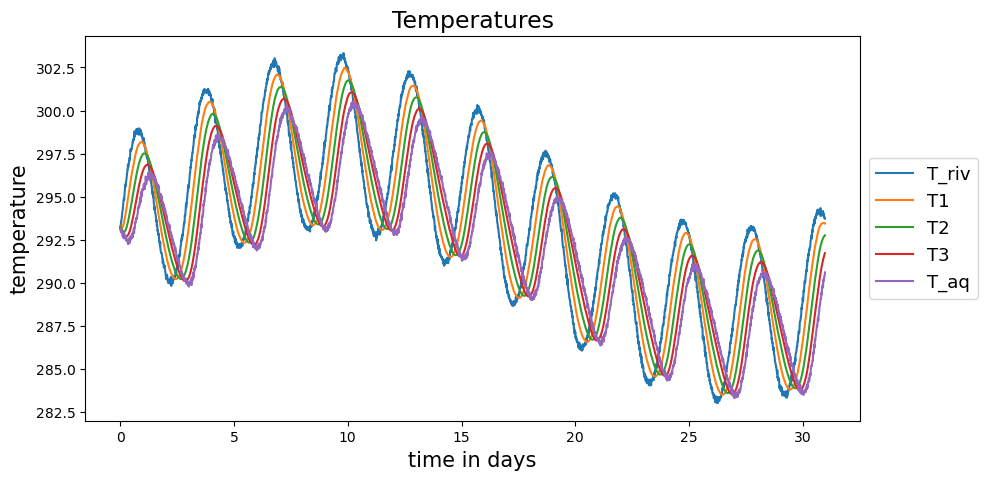

In [17]:

# print(emu_observ_test_user1._T_Shaft)
emu_observ._measures_column_one_layer(col)
#emu_observ_test_user1._plot_molonariT_data()
col.plot_temperature_at_sensors(verbose=False)



Text(0.5, 1.0, 'Pressure head time series at the bottom sensor')

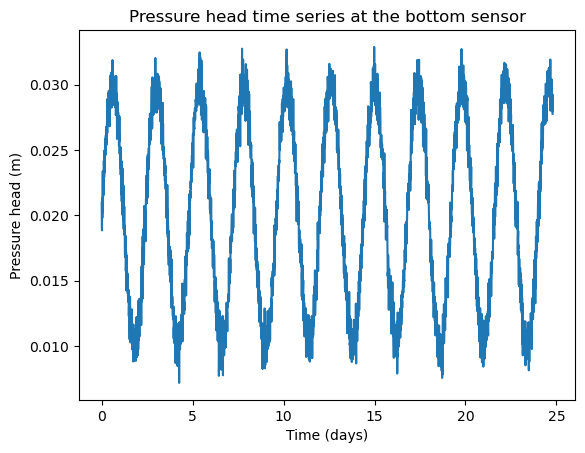

In [18]:
plt.plot(emu_observ._time_array/(3600*30), emu_observ._dH, label='dH signal')
plt.xlabel('Time (days)')
plt.ylabel('Pressure head (m)')
plt.title('Pressure head time series at the bottom sensor')

### Safety diagnosis

Major problem, the column object only simulates between 0 and Z_bottom.

In [19]:
print("Number of z values in col:", len(col._z_solve))
print("First z value in col:", col._z_solve[0])
print("Last z value in col:", col._z_solve[-1])

Number of z values in col: 100
First z value in col: 0.002
Last z value in col: 0.398


The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

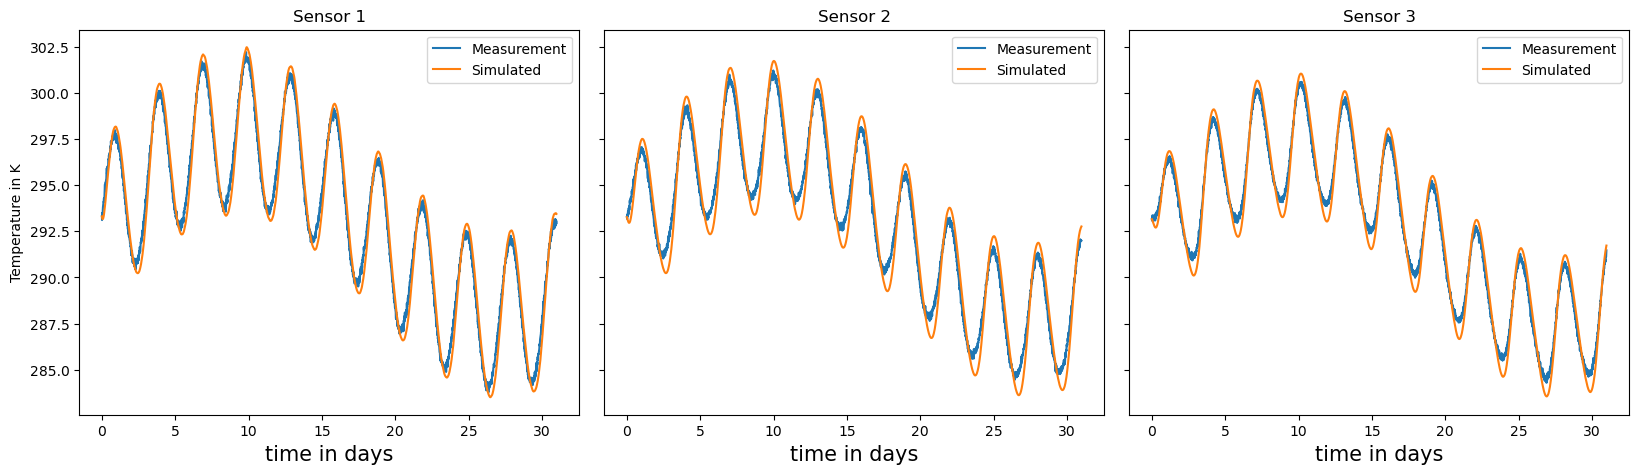

In [20]:

col.plot_compare_temperatures_sensors()

Here are temperature profiles simulated by pyheatmy

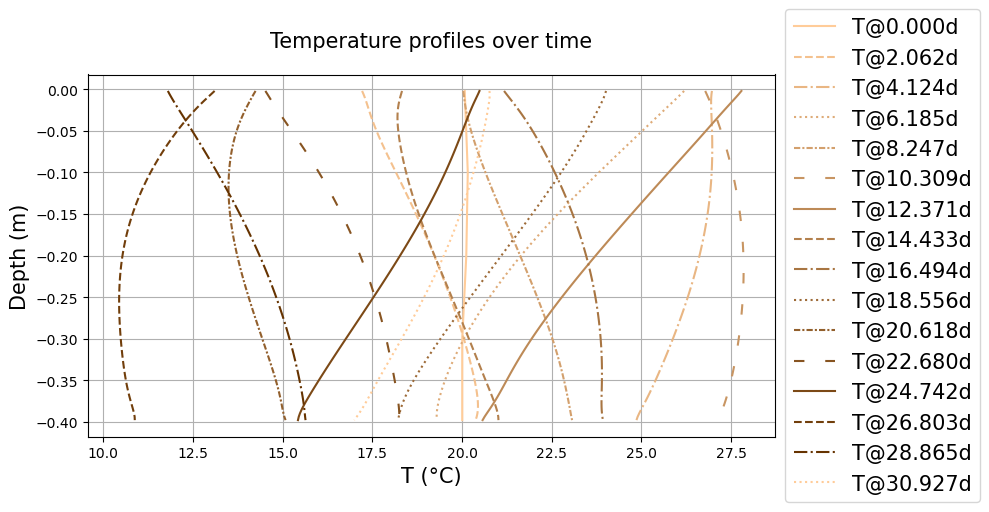

In [21]:
nt = len(col._temperatures[0,:])
dplot=15
col.plot_temperatures_umbrella(round(nt/dplot))



Now creating a new column created with the generated case study

[(datetime.datetime(2011, 8, 1, 0, 0), array([293.16268786, 293.26816126, 293.18951777, 293.16040197])), (datetime.datetime(2011, 8, 1, 0, 15), array([293.35438346, 293.22607423, 293.33463171, 293.01745592])), (datetime.datetime(2011, 8, 1, 0, 30), array([293.32349523, 293.30375645, 293.04829958, 293.025543  ])), (datetime.datetime(2011, 8, 1, 0, 45), array([293.15304479, 293.28151053, 293.07307808, 293.01502516])), (datetime.datetime(2011, 8, 1, 1, 0), array([293.26272577, 293.24495233, 293.11345091, 292.93450492])), (datetime.datetime(2011, 8, 1, 1, 15), array([293.0985514 , 293.20376006, 293.17909518, 293.08045027])), (datetime.datetime(2011, 8, 1, 1, 30), array([292.88380466, 293.08129709, 293.05941445, 292.94884641])), (datetime.datetime(2011, 8, 1, 1, 45), array([293.1330885 , 292.9511501 , 292.87775806, 293.01454089])), (datetime.datetime(2011, 8, 1, 2, 0), array([293.29790361, 293.12213322, 292.95507833, 292.65927286])), (datetime.datetime(2011, 8, 1, 2, 15), array([293.0679225

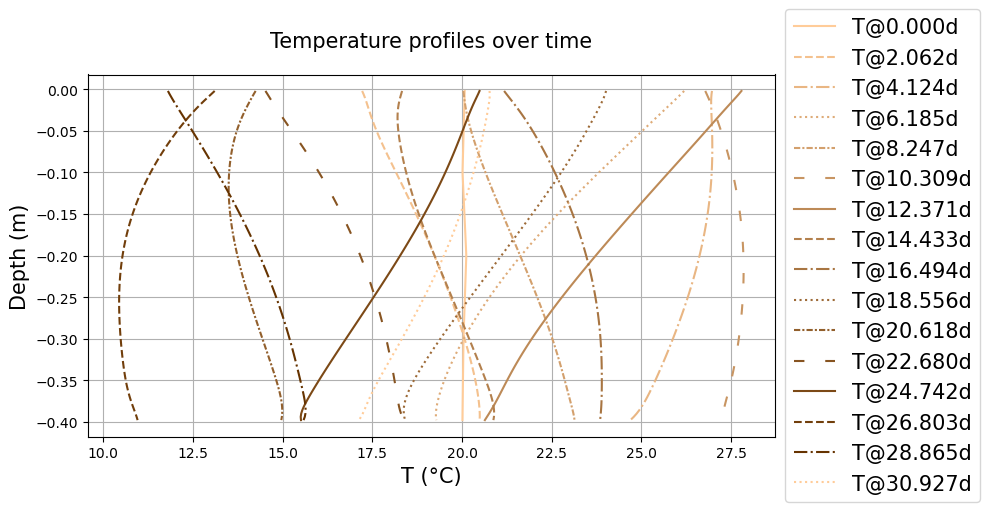

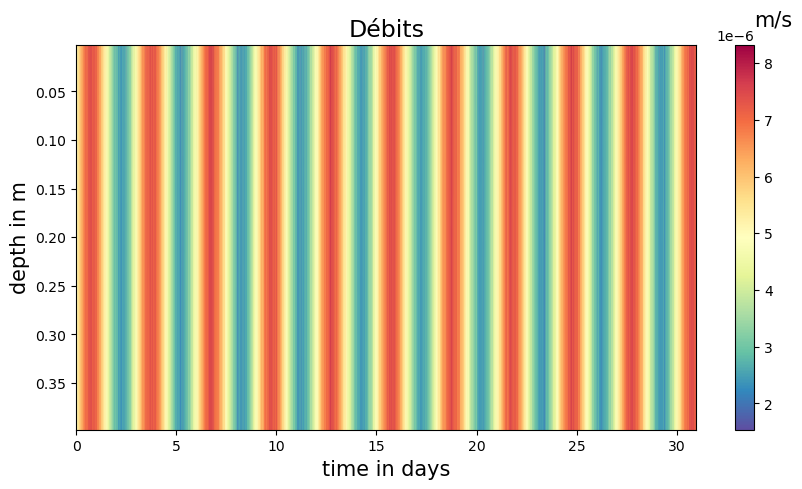

RMSE at sensor 0 : 0.09941817820388724
RMSE at sensor 1 : 0.10266984918828316
RMSE at sensor 2 : 0.10071493130456839
Total RMSE : 0.10094316796661479
Plotting Température in column. time series have nrecords =  2976
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv closed successfully.
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualLabo/pressure_sensors/Pvirtual.csv
Printing Sensor file 1
File /Users/noedaniel

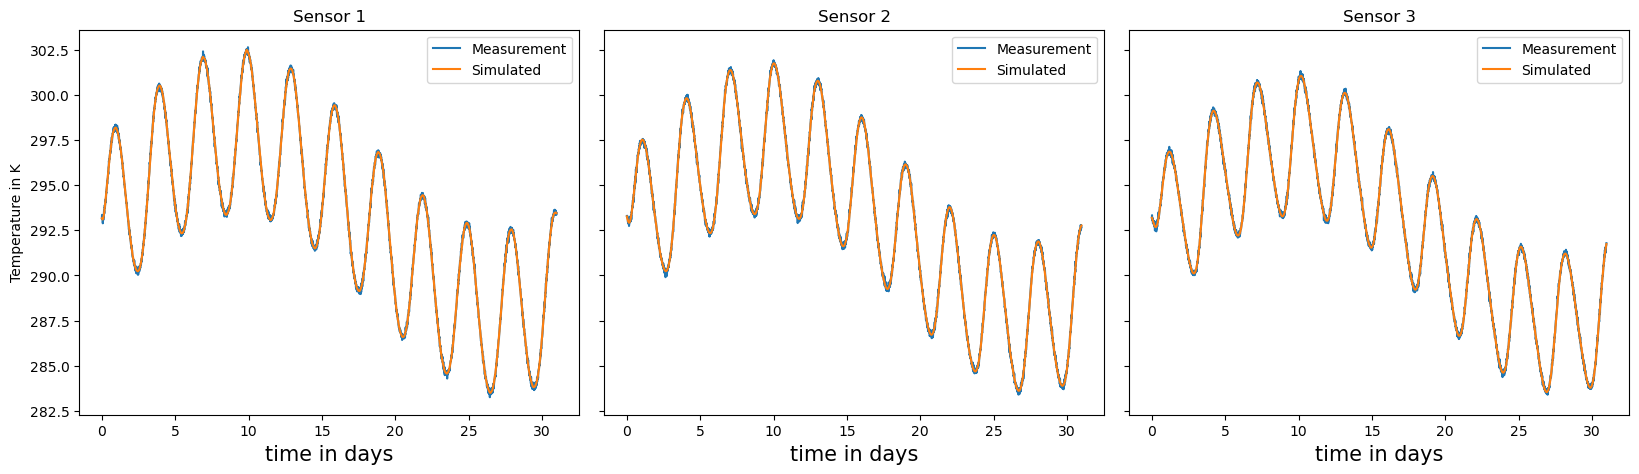

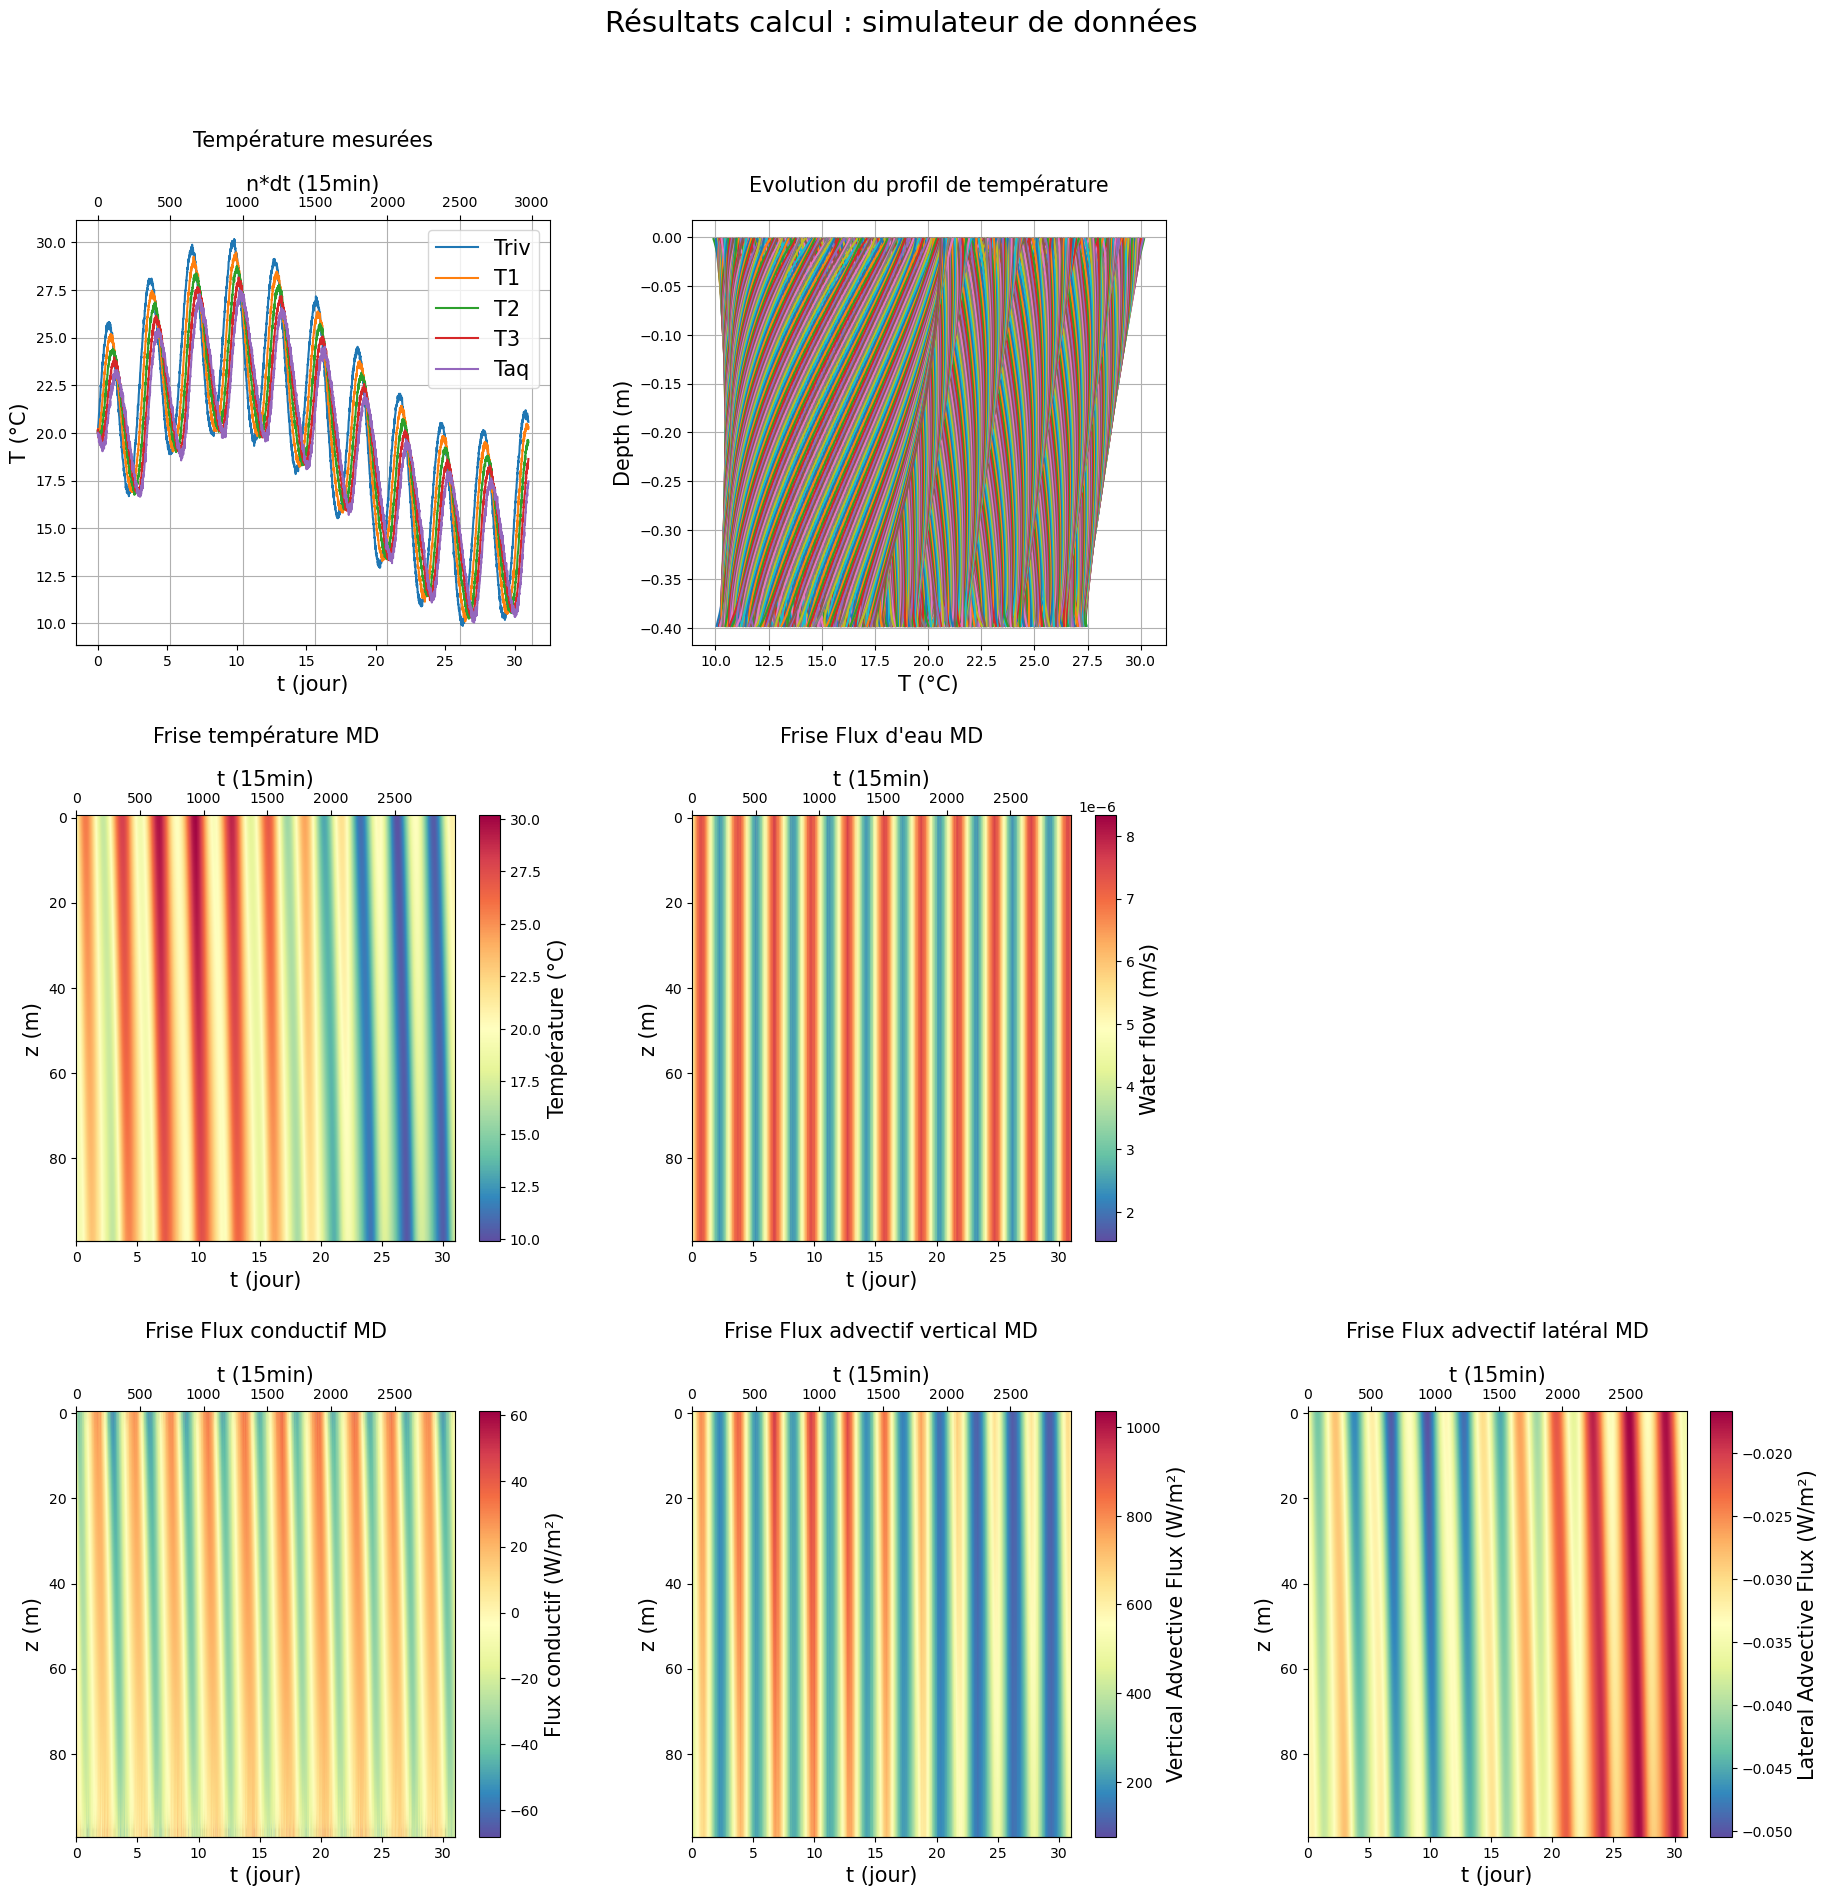

In [22]:
print(emu_observ._molonariT_data)

# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol_dict = {
	"river_bed": 8., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ._molonariP_data,
    "T_measures": emu_observ._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
newCol = Column.from_dict(newCol_dict)
newCol.set_layers(Layer1)
newCol.compute_solve_transi(verbose=True)

nt = len(newCol._temperatures[0,:])
dplot=15
newCol.plot_temperatures_umbrella(round(nt/dplot))

flows = newCol.get_flows_solve()
unitLeg="m/s"
title="Débits"
newCol.plot_it_Zt(flows,title,unitLeg,1.04,2)

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
newCol.plot_CALC_results()
newCol.print_in_file_processed_MOLONARI_dataset(zeroT=0)

# Inversion

/Users/noedaniel/Desktop/MOLONARI/MOLONARI1D/pyheatmy/pyheatmy/params.py:98: RuntimeWarning: divide by zero encountered in log10
  1 + np.log10(abs_val / self.linthresh),


[Prior sur l'intervalle physique [1.00e-13, 1.00e-10], échelle: log, Prior sur l'intervalle physique [1.00e-02, 2.50e-01], échelle: linear, Prior sur l'intervalle physique [1.00e+00, 1.00e+01], échelle: linear, Prior sur l'intervalle physique [1.00e+06, 1.00e+07], échelle: linear, Prior sur l'intervalle physique [-1.00e-06, 1.00e-06], échelle: symlog]
--- Compute MCMC ---
Priors :
    [Prior sur l'intervalle physique [1.00e-13, 1.00e-10], échelle: log, Prior sur l'intervalle physique [1.00e-02, 2.50e-01], échelle: linear, Prior sur l'intervalle physique [1.00e+00, 1.00e+01], échelle: linear, Prior sur l'intervalle physique [1.00e+06, 1.00e+07], échelle: linear, Prior sur l'intervalle physique [-1.00e-06, 1.00e-06], échelle: symlog]
Number of cells : 100
Number of iterations : 30
Number of chains : 10
--------------------
Subsampling for Quantile computation every 1 iterations
Size of the subsampling per chain : 30 iterations among 30 iterations
Initialisation - Utilisation de la mémoir

Burn in phase: 100%|██████████| 25/25 [01:01<00:00,  2.46s/it]


Initialisation post burn-in - Utilisation de la mémoire (en Mo) : 240.59904
DREAM MCMC Computation: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]
Acceptance rate : [0.         0.06666667 0.03333334 0.13333334 0.16666667 0.13333334
 0.06666667 0.03333334 0.13333334 0.03333334]
Quantiles computed


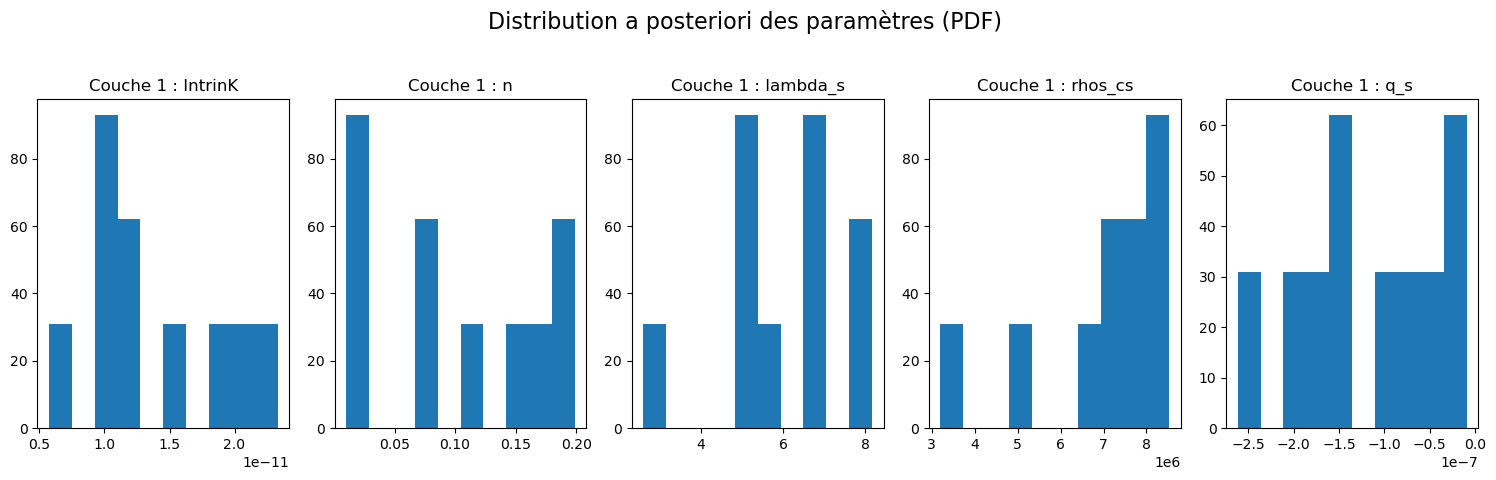

In [23]:
NBITERMCMC = 30

priors = {
    "Prior_IntrinK": ((1e-13, 1e-10), 5e-10), # (intervalle, sigma)
    "Prior_n": ((.01, .25), .0125),
    "Prior_lambda_s": ((1, 10), .5),
    "Prior_rhos_cs": ((1e6,1e7), 5e5),
    "Prior_q_s": ((-1e-6,1e-6), 1e-12),
}

Layer_homogenous = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "IntrinK":1e-11,
    "n": 0.1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q_s": -1e-8,
}

Layer_homogenous = Layer.from_dict(Layer_homogenous)

# On crée une couche de référence pour la comparaison plus bas
reference_params_dict = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "IntrinK":intrinK,
    "n": n,
    "lambda_s": lambda_s,
    "rhos_cs": rhos_cs,
    "q_s": q_s,
}

layer_for_simulation = Layer.from_dict(reference_params_dict)

newCol.set_layers(Layer_homogenous)
Layer_homogenous.set_priors_from_dict(priors)
print(Layer_homogenous.Prior_list)


newCol.all_layers

newCol.compute_mcmc(
    nb_iter = NBITERMCMC,
    verbose=True
)

bestLayers = newCol.get_best_layers()

newCol.plot_all_param_pdf()


--- Compute Solve Transi ---
One layer : IntrinK = 2.107343119450711e-11, n = 0.01001010276377201, lambda_s = 4.956319808959961, rhos_cs = 7801790.0, q_s = -2.0188819860322837e-07
Solving the flow with intrinsec permeability 2.107343119450711e-11, and permeability 0.0002067303576041013
Done.
RMSE at sensor 0 : 0.1759293087755245
RMSE at sensor 1 : 0.2601591360719774
RMSE at sensor 2 : 0.2671376650991783
Total RMSE : 0.23804511468948641
Plotting Température in column. time series have nrecords =  2976


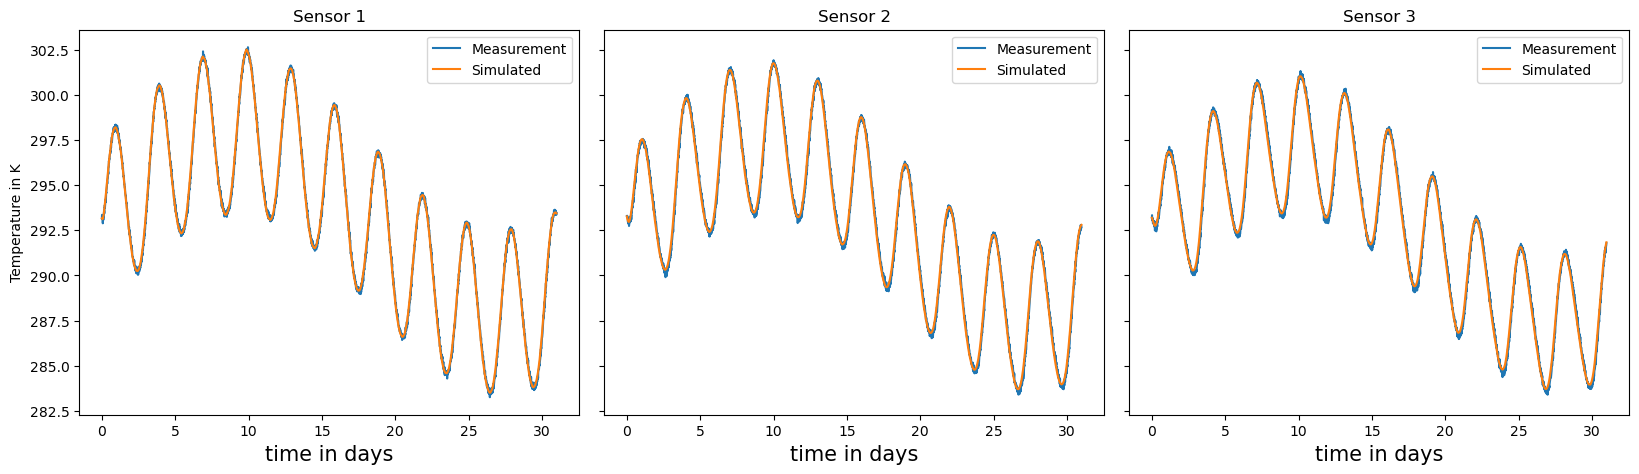

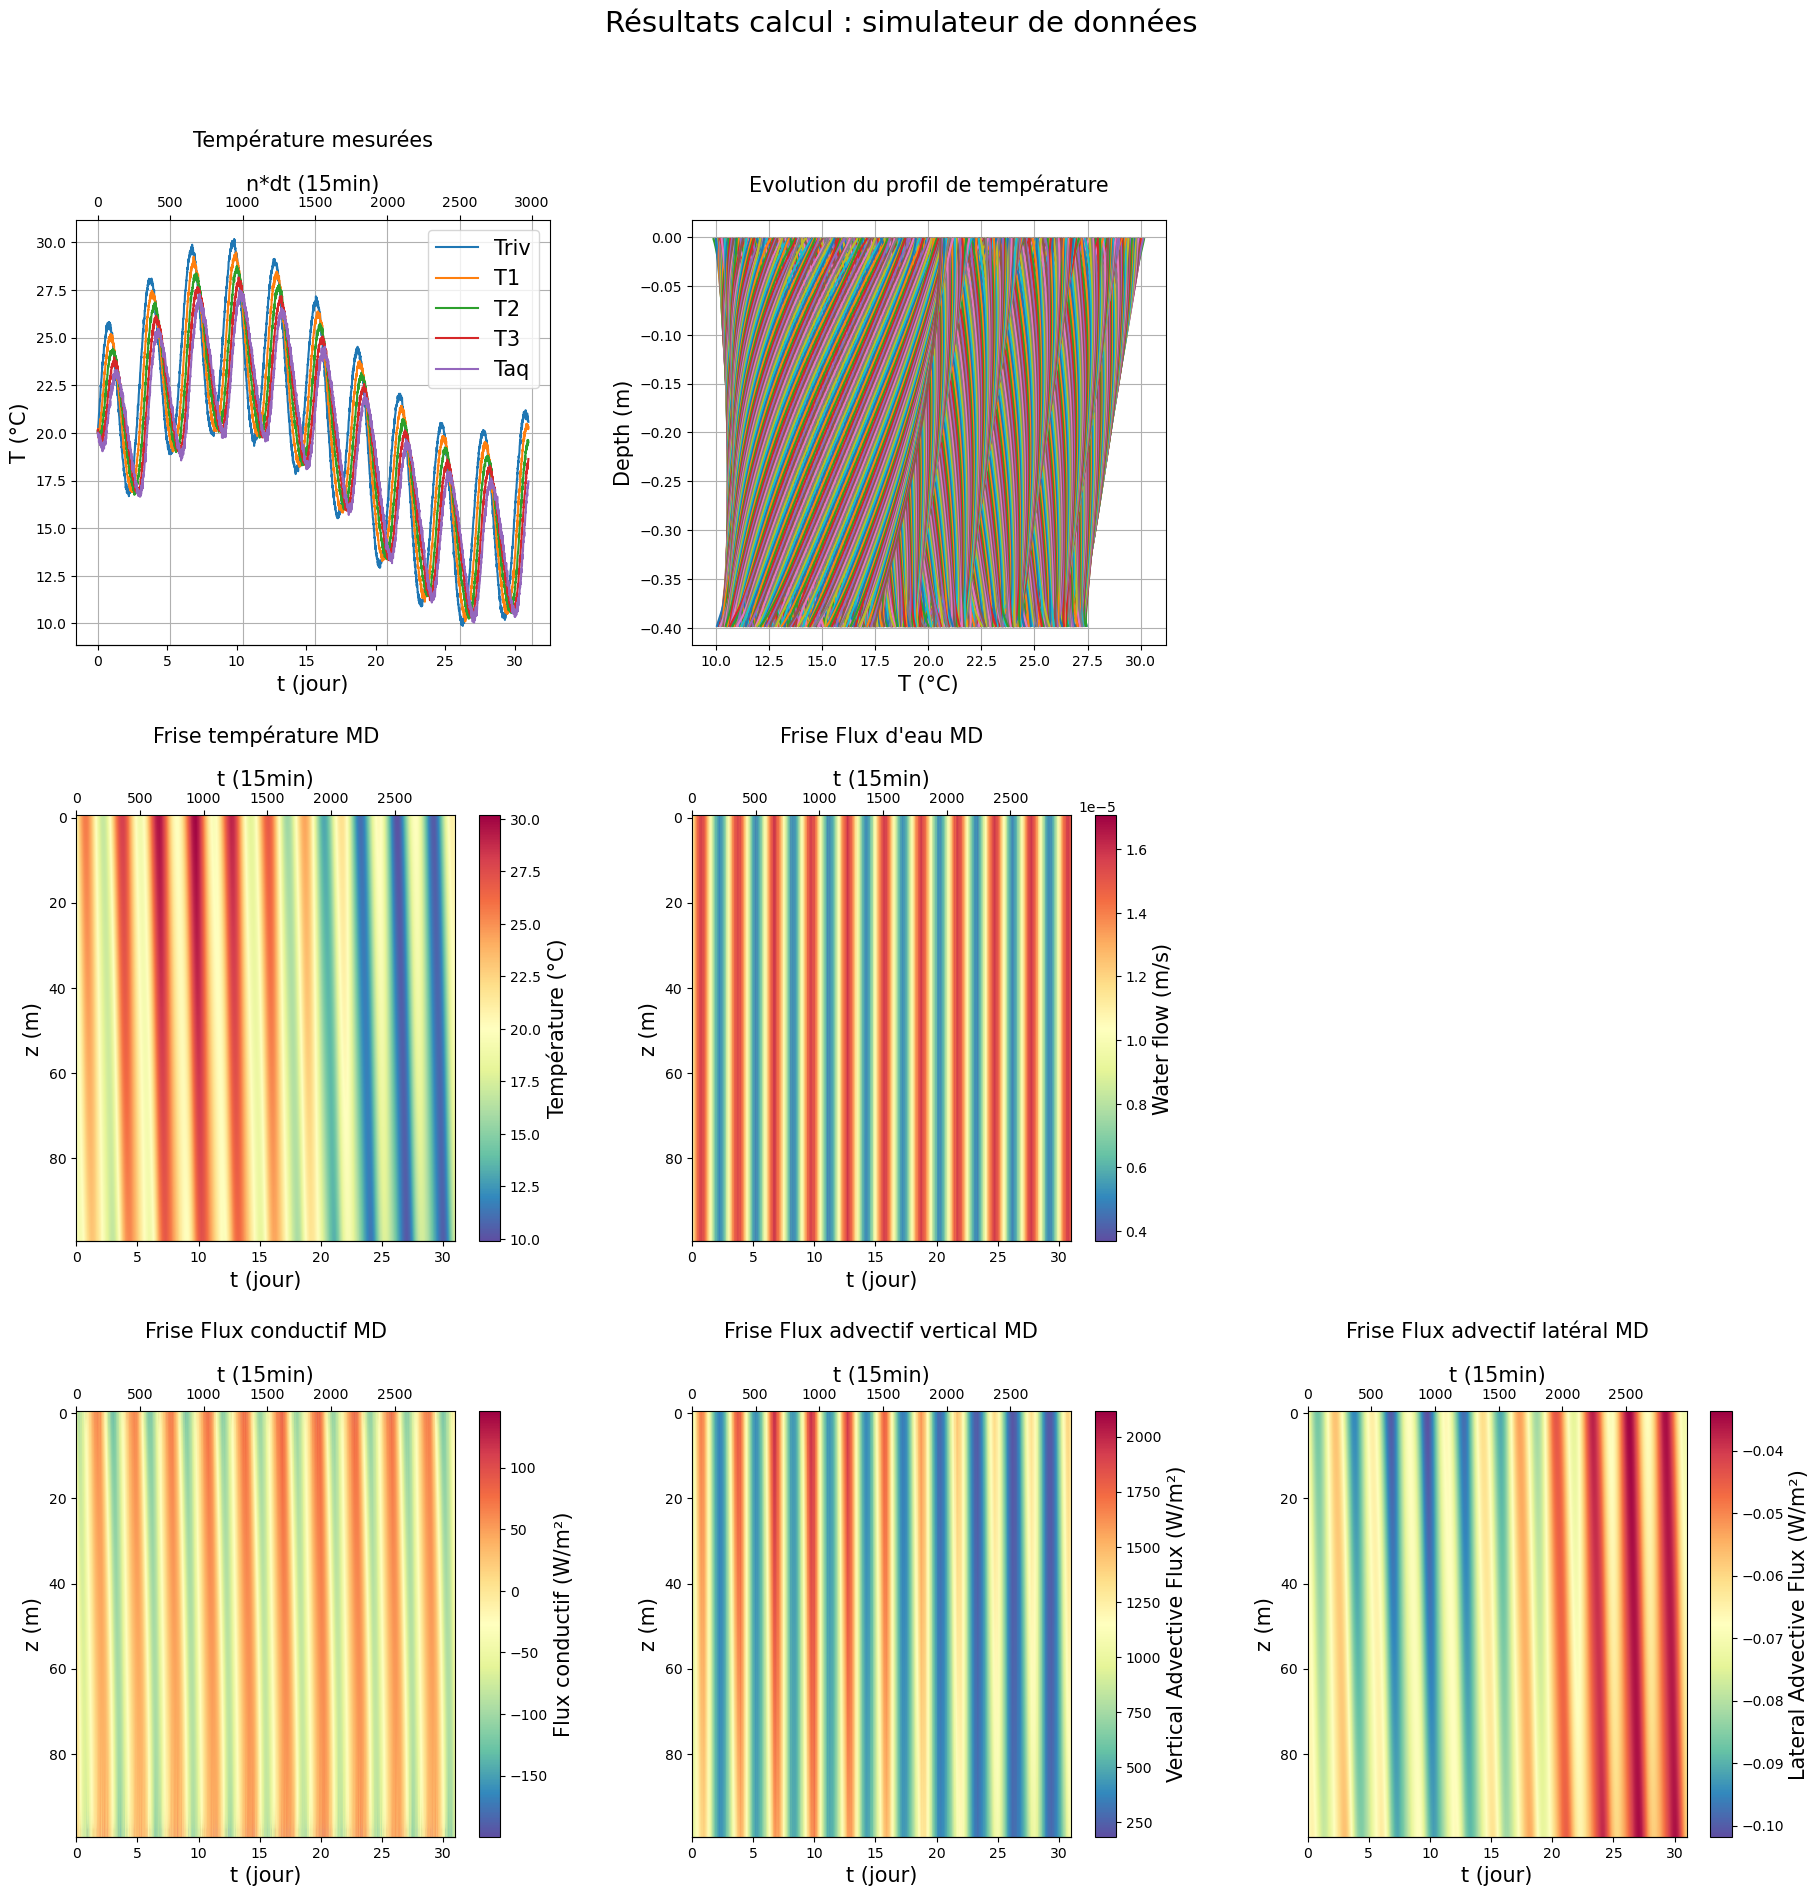

In [24]:
newCol.compute_solve_transi()

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
newCol.plot_CALC_results()

In [25]:
import pandas as pd

# --- ÉTAPE 1 : ACTION (inchangée) ---
newCol.get_best_layers()

# --- ÉTAPE 2 : RÉCUPÉRATION (inchangée) ---
inverted_params = newCol.get_list_current_params()[0]

# --- ÉTAPE 3 : COMPARAISON (corrigée) ---
# On utilise maintenant le dictionnaire de référence pour les "vraies" valeurs.
data = {
    'Paramètre': PARAM_LIST,
    'Valeur de Référence': [
        reference_params_dict['IntrinK'],
        reference_params_dict['n'],
        reference_params_dict['lambda_s'],
        reference_params_dict['rhos_cs'],
        reference_params_dict['q_s']
    ],
    'Valeur Inversée (MCMC)': [
        inverted_params.IntrinK,
        inverted_params.n,
        inverted_params.lambda_s,
        inverted_params.rhos_cs,
        inverted_params.q_s
    ]
}

# Créer et afficher le tableau de comparaison
comparison_df = pd.DataFrame(data)

# Appliquer un formatage pour une meilleure lisibilité
comparison_df['Valeur de Référence'] = comparison_df['Valeur de Référence'].map('{:.7e}'.format)
comparison_df['Valeur Inversée (MCMC)'] = comparison_df['Valeur Inversée (MCMC)'].map('{:.7e}'.format)

print("--- Comparaison des paramètres de référence et inversés ---")
print(comparison_df.to_string(index=False))

--- Comparaison des paramètres de référence et inversés ---
Paramètre Valeur de Référence Valeur Inversée (MCMC)
  IntrinK       1.0000000e-11          2.1073431e-11
        n       1.0000000e-01          1.0010103e-02
 lambda_s       2.0000000e+00          4.9563198e+00
  rhos_cs       4.0000000e+06          7.8017900e+06
      q_s      -1.0000000e-07         -2.0188820e-07
